##Mamadou DIOUF

#Mathematics and Computer Science M2 Track, UPEC & UGE

#Data science project


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Train test

In [3]:
data = pd.read_csv('/content/drive/MyDrive/train_file.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,155.057478,39.471934,22.32247,21.40113,20.51302,19.62691,19.34791,6,151,0.659869,4562,55570,45,GALAXY
1,1.237679e+18,29.186923,33.102558,25.85486,24.22573,21.48514,20.38426,19.38826,5,116,0.813819,7735,58136,763,GALAXY
2,1.237668e+18,143.780304,16.857367,22.62750,21.41766,19.54710,18.87770,18.39861,2,88,0.404277,5317,56000,499,GALAXY
3,1.237665e+18,154.753807,34.679618,20.25937,18.53387,17.58141,17.16960,16.85448,6,179,0.108840,1954,53357,63,GALAXY
4,1.237662e+18,212.519940,36.429773,22.03892,21.46501,21.32925,21.26120,21.17124,3,521,-0.001039,3855,55268,690,STAR


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   obj_ID    80000 non-null  float64
 1   alpha     80000 non-null  float64
 2   delta     80000 non-null  float64
 3   u         80000 non-null  float64
 4   g         80000 non-null  float64
 5   r         80000 non-null  float64
 6   i         80000 non-null  float64
 7   z         80000 non-null  float64
 8   cam_col   80000 non-null  int64  
 9   field_ID  80000 non-null  int64  
 10  redshift  80000 non-null  float64
 11  plate     80000 non-null  int64  
 12  MJD       80000 non-null  int64  
 13  fiber_ID  80000 non-null  int64  
 14  class     80000 non-null  object 
dtypes: float64(9), int64(5), object(1)
memory usage: 9.2+ MB


In [5]:
for i in data.columns:

  print(np.max(data[i].value_counts()))

14
1
1
63
6
18
5
48
15558
384
326
80
213
133
47585


In [6]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [7]:
data_val = pd.read_csv('/content/drive/MyDrive/test_file.csv')
data_val.head()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,1.237679e+18,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,6,442,0.506237,4312,55511,495
1,1.237662e+18,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,1,243,0.000345,2175,54612,348
2,1.237679e+18,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,1,536,0.000004,7332,56683,943
3,1.237668e+18,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,1,134,-0.000291,4066,55444,326
4,1.237679e+18,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,3,148,-0.000136,7914,57331,363


In [8]:
d= data.iloc[:,1:-1]
data_un = pd.concat([d, data_val.iloc[:,1:]], axis=0)
data_un.describe()

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,3.511610,186.130520,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1.586912,149.011073,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,11.000000,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.000000,82.000000,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4.000000,146.000000,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5.000000,241.000000,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,6.000000,989.000000,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_un)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,0.024252,0.194406
1,0.727615,0.102759


In [10]:
# Building the clustering model
#spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')

# Training the model and Storing the predicted cluster labels
#labels_nn = spectral_model_nn.fit_predict(X_principal)

Data validation

In [11]:
d

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,155.057478,39.471934,22.32247,21.40113,20.51302,19.62691,19.34791,6,151,0.659869,4562,55570,45
1,29.186923,33.102558,25.85486,24.22573,21.48514,20.38426,19.38826,5,116,0.813819,7735,58136,763
2,143.780304,16.857367,22.62750,21.41766,19.54710,18.87770,18.39861,2,88,0.404277,5317,56000,499
3,154.753807,34.679618,20.25937,18.53387,17.58141,17.16960,16.85448,6,179,0.108840,1954,53357,63
4,212.519940,36.429773,22.03892,21.46501,21.32925,21.26120,21.17124,3,521,-0.001039,3855,55268,690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,242.605987,36.722746,20.82854,20.32382,20.25718,20.39426,20.36549,2,235,2.412806,10733,58244,380
79996,171.747491,53.692339,18.93209,16.96611,16.05940,15.64639,15.30356,2,151,0.081128,1013,52707,104
79997,156.991726,38.612456,23.95684,21.37612,19.75149,18.49137,17.77083,3,159,0.000253,3262,54884,541
79998,55.829432,9.764397,17.79224,16.47265,15.84970,15.59104,15.46414,5,67,0.000000,2679,54368,287


In [13]:
from sklearn.model_selection import train_test_split
label = data['class']
X = data.drop(['class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, label, test_size=0.3,stratify=label, random_state=42, shuffle=True)

In [14]:
pip install dask-expr

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


def _preprocess_X(X_sparse):
    # cast a dense array
    #X = X_sparse.toarray()

    # normalize each row
    return normalize(X_sparse)

class Classifier(object):
    def __init__(self):
        # Use scikit-learn's pipeline
        self.pipe = make_pipeline(
            StandardScaler(with_mean=True, with_std=True),
            # LDA(n_components=2),
            #SVC(kernel='rbf', max_iter=15
            SVC(kernel='linear', degree=3,max_iter=2000,tol=1e-26,)
            #RandomForestClassifier(
        )

    def fit(self, X_sparse, y):
        X = _preprocess_X(X_sparse)
        #X_uda, y_uda = apply_uda(X,y)
        self.pipe.fit( X, y)
        self.classes_ = self.pipe.classes_
        pass

    def predict(self, X_sparse):
        X = _preprocess_X(X_sparse)
        # here we use RandomForest.predict_proba()
        return self.pipe.predict(X)

In [19]:
clf = Classifier()
clf.fit(x_train, y_train)
# predict_proba
y_tr_pred_proba = clf.predict(x_train)
y_te_pred_proba = clf.predict(x_test)

# convert to hard classification with argmax
# y_tr_pred = clf.classes_[np.argmax(y_tr_pred_proba, axis=1)]
# y_te_pred = clf.classes_[np.argmax(y_te_pred_proba, axis=1)]

In [20]:
y_tr_pred_proba

array(['QSO', 'QSO', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'QSO'],
      dtype=object)

Train balanced accuracy : 0.919
Test balanced accuracy : 0.920


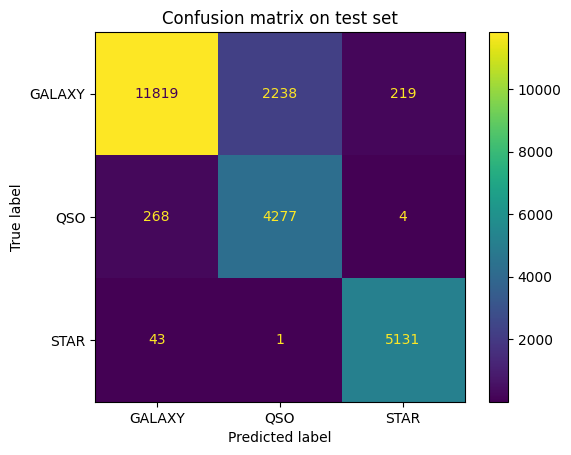

In [21]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# compute balanced accuracy and confusion matrix
print(f"Train balanced accuracy : {balanced_accuracy_score(y_train, y_tr_pred_proba):.3f}")
print(f"Test balanced accuracy : {balanced_accuracy_score(y_test, y_te_pred_proba):.3f}")
cm = confusion_matrix(y_test, y_te_pred_proba)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_, )
disp.plot()
plt.title("Confusion matrix on test set");

In [22]:
accuracy_score(y_train,y_tr_pred_proba)

0.8842142857142857

In [23]:
accuracy_score(y_test,y_te_pred_proba)

0.8844583333333333

In [24]:
balanced_accuracy_score(y_test, y_te_pred_proba)

np.float64(0.9198657301934966)

In [25]:
class Classifier2(object):
    def __init__(self):
        # Use scikit-learn's pipeline
        self.pipe = make_pipeline(
            StandardScaler(with_mean=True, with_std=True),
            #LDA(n_components=2),
            #SVC(kernel='rbf', max_iter=15

            RandomForestClassifier(class_weight='balanced')
        )

    def fit(self, X_sparse, y):
        X = _preprocess_X(X_sparse)
        #X_uda, y_uda = apply_uda(X,y)
        self.pipe.fit( X, y)
        self.classes_ = self.pipe.classes_
        pass

    def predict(self, X_sparse):
        X = _preprocess_X(X_sparse)
        # here we use RandomForest.predict_proba()
        return self.pipe.predict(X)

In [26]:
clf2 = Classifier2()
clf2.fit(x_train, y_train)
# predict_proba
y_tr_pred = clf2.predict(x_train)
y_te_pred = clf2.predict(x_test)

Train balanced accuracy : 1.000
Test balanced accuracy : 0.970


Text(0.5, 1.0, 'Confusion matrix on test set')

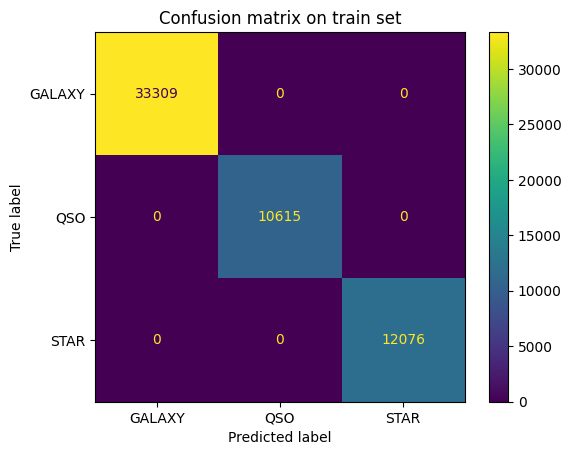

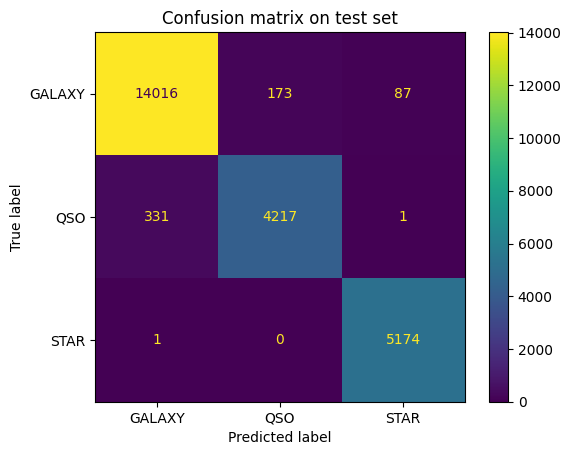

In [27]:
# compute balanced accuracy and confusion matrix
print(f"Train balanced accuracy : {balanced_accuracy_score(y_train, y_tr_pred):.3f}")
print(f"Test balanced accuracy : {balanced_accuracy_score(y_test, y_te_pred):.3f}")
cm = confusion_matrix(y_train, y_tr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_, )
disp.plot()
plt.title("Confusion matrix on train set")

cm_test = confusion_matrix(y_test, y_te_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_, )
disp2.plot()
plt.title("Confusion matrix on test set")

In [28]:
accuracy_score(y_train,y_tr_pred)

1.0

In [29]:
accuracy_score(y_test,y_te_pred)

0.9752916666666667

In [30]:
from lightgbm import LGBMClassifier

In [31]:
class Classifier3(object):
    def __init__(self):
        # Use scikit-learn's pipeline
        self.pipe = make_pipeline(
            StandardScaler(with_mean=True, with_std=True),
            #LDA(n_components=2),
            #SVC(kernel='rbf', max_iter=15

            LGBMClassifier(boosting_type='dart')
        )

    def fit(self, X_sparse, y):
        X = _preprocess_X(X_sparse)
        #X_uda, y_uda = apply_uda(X,y)
        self.pipe.fit( X, y)
        self.classes_ = self.pipe.classes_
        pass

    def predict(self, X_sparse):
        X = _preprocess_X(X_sparse)
        # here we use RandomForest.predict_proba()
        return self.pipe.predict(X)

In [32]:
clf3 = Classifier3()
clf3.fit(x_train, y_train)
# predict_proba
y_tr_pred = clf3.predict(x_train)
y_te_pred = clf3.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 13
[LightGBM] [Info] Start training from score -0.519524
[LightGBM] [Info] Start training from score -1.663084
[LightGBM] [Info] Start training from score -1.534132


Train balanced accuracy : 0.977
Test balanced accuracy : 0.969


Text(0.5, 1.0, 'Confusion matrix on test set')

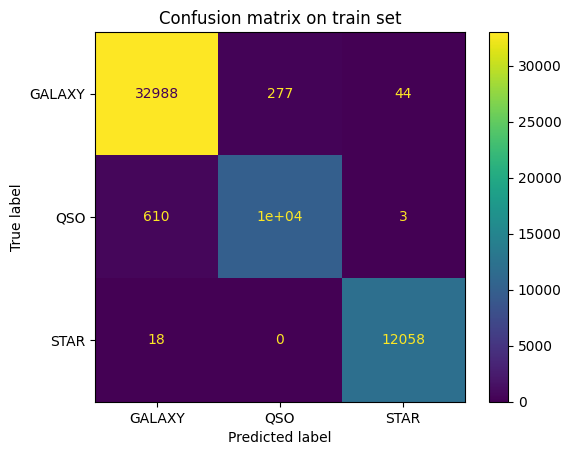

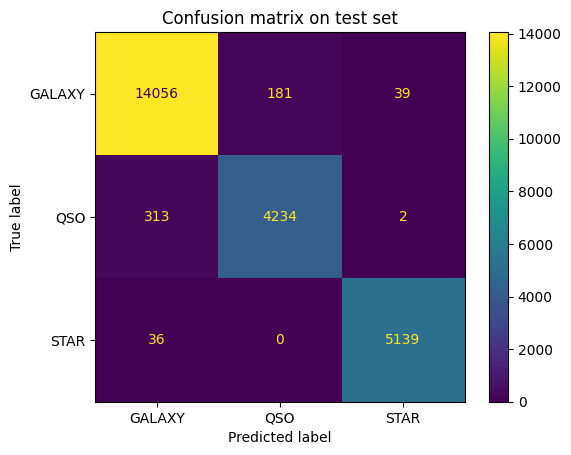

In [33]:
# compute balanced accuracy and confusion matrix
print(f"Train balanced accuracy : {balanced_accuracy_score(y_train, y_tr_pred):.3f}")
print(f"Test balanced accuracy : {balanced_accuracy_score(y_test, y_te_pred):.3f}")
cm = confusion_matrix(y_train, y_tr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_, )
disp.plot()
plt.title("Confusion matrix on train set")

cm_test = confusion_matrix(y_test, y_te_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_, )
disp2.plot()
plt.title("Confusion matrix on test set")

In [34]:
accuracy_score(y_train,y_tr_pred)

0.983

In [35]:
accuracy_score(y_test,y_te_pred)

0.9762083333333333

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
class Classifier4(object):
    def __init__(self):
        # Use scikit-learn's pipeline
        self.pipe = make_pipeline(
            StandardScaler(with_mean=True, with_std=True,),
            #LDA(n_components=2),
            #SVC(kernel='rbf', max_iter=15

            LogisticRegression(tol=1e-26,max_iter=1000)
        )

    def fit(self, X_sparse, y):
        X = _preprocess_X(X_sparse)
        #X_uda, y_uda = apply_uda(X,y)
        self.pipe.fit( X, y)
        self.classes_ = self.pipe.classes_
        pass

    def predict(self, X_sparse):
        X = _preprocess_X(X_sparse)
        # here we use RandomForest.predict_proba()
        return self.pipe.predict(X)

In [38]:
clf4 = Classifier4()
clf4.fit(x_train, y_train)
# predict_proba
y_tr_pred = clf4.predict(x_train)
y_te_pred = clf4.predict(x_test)

In [39]:
accuracy_score(y_train,y_tr_pred)

0.9574107142857143

In [40]:
accuracy_score(y_test,y_te_pred)

0.9573333333333334

Text(0.5, 1.0, 'Confusion matrix on test set')

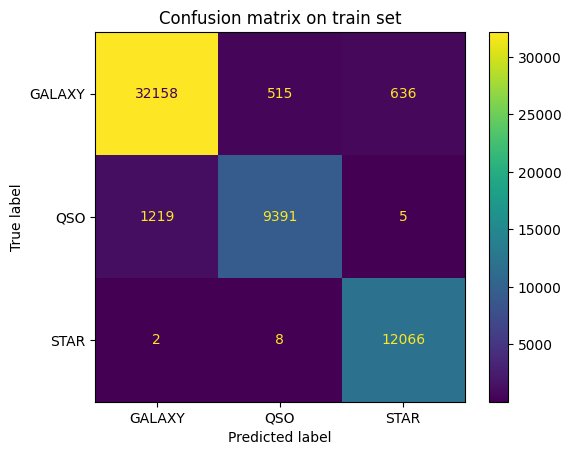

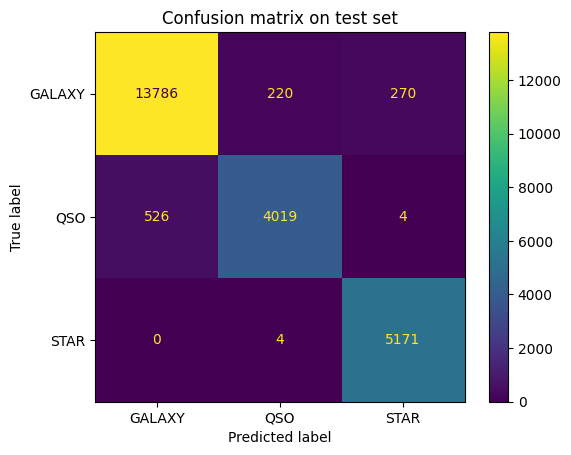

In [41]:
cm = confusion_matrix(y_train, y_tr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_,)
disp.plot()
plt.title("Confusion matrix on train set")

cm_test = confusion_matrix(y_test, y_te_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_, )
disp2.plot()
plt.title("Confusion matrix on test set")

In [42]:
y_val_pred = clf.predict(data_val)
pd.DataFrame(y_val_pred).to_csv('submission1.csv')
pd.DataFrame(y_val_pred).value_counts()

,count
0,
GALAXY,10080
QSO,5406
STAR,4514


In [43]:
y_val_pred = clf2.predict(data_val)
pd.DataFrame(y_val_pred).to_csv('submission2.csv')
pd.DataFrame(y_val_pred).value_counts()

,count
0,
GALAXY,11947
STAR,4409
QSO,3644


In [44]:
y_val_pred = clf3.predict(data_val)
pd.DataFrame(y_val_pred).to_csv('submission3.csv')
pd.DataFrame(y_val_pred).value_counts()

,count
0,
GALAXY,11986
STAR,4350
QSO,3664


In [45]:
y_val_pred = clf4.predict(data_val)
pd.DataFrame(y_val_pred).to_csv('submission4.csv')
pd.DataFrame(y_val_pred).value_counts()

,count
0,
GALAXY,11863
STAR,4582
QSO,3555


Next reduce the dimension and train and improve models